In [14]:
parag_windows = 'C:\\Users\\parag\\Dropbox (Personal)\\sub_lot_paper\\source_code\\'
parag_mac = '/Users/paragsiddique/LoDI Dropbox/sub_lot_paper/source_code/'
import sys
sys.path.append(parag_windows)

In [15]:
import matplotlib.pyplot as plt
import pickle 

In [16]:
from parking_env.parking_lot import *
from parking_env.sub_lot import *
from parking_env.traditional_lot import *
from parking_env.retrieval_algorithms import *
from parking_env.sub_lot_utils import *
from parking_env.utils import *
from parking_env.sub_lot_cost_function import *

In [17]:
width = 460
length = 750
cell_size = 9
sub_lot_speed=3.5
driving_lane_speed = 11

# No. of cars

In [18]:
traditional_parking_lot = TraditionalLot(width, length)
state = traditional_parking_lot.state()

In [19]:
no_of_cars_traditional = len(state)
no_of_cars_traditional

1323

In [20]:
min_rows, max_rows = 3, 10
min_cols, max_cols = 3, 6

In [21]:
sub_lot_sizes = []
for i in list(range(min_rows, max_rows+1)):
    for j in list(range(min_cols, max_cols+1)):
        sub_lot_sizes.append((i, j))

In [22]:
no_of_cars_cardinal_sub_lot ={}
for sublot_rows, sublot_columns in sub_lot_sizes:
    modular_parking_lot = ModularLot(width, length, sublot_rows, sublot_columns)
    if modular_parking_lot.total_no_of_cars()>no_of_cars_traditional:
        no_of_cars_cardinal_sub_lot[(sublot_rows, sublot_columns)] = modular_parking_lot.total_no_of_cars()
no_of_cars_cardinal_sub_lot

{(5, 6): 1366,
 (6, 6): 1406,
 (7, 5): 1407,
 (7, 6): 1456,
 (8, 3): 1340,
 (8, 5): 1383,
 (8, 6): 1466,
 (9, 5): 1431,
 (9, 6): 1486,
 (10, 3): 1360,
 (10, 4): 1328,
 (10, 5): 1443,
 (10, 6): 1516}

In [23]:
n_sorted = sorted(no_of_cars_cardinal_sub_lot.keys(), key=lambda tup: tup[1])
n_sorted

[(8, 3),
 (10, 3),
 (10, 4),
 (7, 5),
 (8, 5),
 (9, 5),
 (10, 5),
 (5, 6),
 (6, 6),
 (7, 6),
 (8, 6),
 (9, 6),
 (10, 6)]

In [24]:
percent_improvement_no_of_cars = {}
for x in n_sorted:
    percent_improvement_no_of_cars[x] = round(100*(no_of_cars_cardinal_sub_lot[x] - no_of_cars_traditional)/no_of_cars_traditional, 2)
    
percent_improvement_no_of_cars

{(8, 3): 1.28,
 (10, 3): 2.8,
 (10, 4): 0.38,
 (7, 5): 6.35,
 (8, 5): 4.54,
 (9, 5): 8.16,
 (10, 5): 9.07,
 (5, 6): 3.25,
 (6, 6): 6.27,
 (7, 6): 10.05,
 (8, 6): 10.81,
 (9, 6): 12.32,
 (10, 6): 14.59}

In [25]:
p_imp_cars = [percent_improvement_no_of_cars[x] for x in n_sorted]
n_cars = [no_of_cars_cardinal_sub_lot[x] for x in n_sorted]

print(p_imp_cars)
print(n_cars)

[1.28, 2.8, 0.38, 6.35, 4.54, 8.16, 9.07, 3.25, 6.27, 10.05, 10.81, 12.32, 14.59]
[1340, 1360, 1328, 1407, 1383, 1431, 1443, 1366, 1406, 1456, 1466, 1486, 1516]


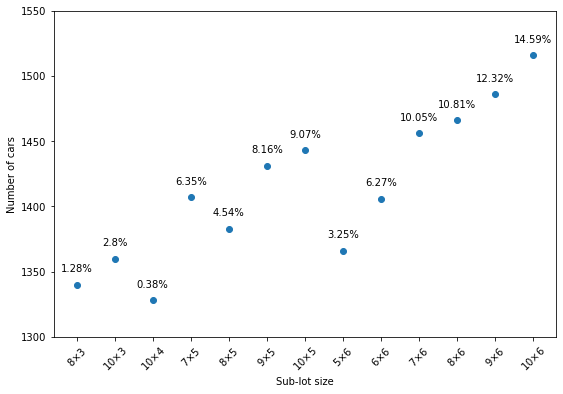

In [26]:
plt.figure(figsize=(9, 6))
plt.plot(n_cars, 'o')
plt.xlabel("Sub-lot size")
plt.ylabel("Number of cars")
plt.xticks(list(range(len(n_sorted))),[str(x[0])+r'$\times$'+str(x[1]) for x in n_sorted], rotation=45)
plt.yticks()
plt.ylim(1300, 1550)
for i, j in [(i, j) for i, j in enumerate(n_cars)]:
    plt.text(i, j+10, str(p_imp_cars[i])+'%', ha='center')
#plt.savefig('cardinal_lot_no_of_cars.pdf')
plt.show()

# Retrieval time

In [27]:
%%time
retrieval_moves_trad_lot = rt_trad(width, length)
mean_distance_traveled_trad_lot = np.around(np.mean(retrieval_moves_trad_lot)*cell_size, 2)
mean_rt_trad_lot = np.ceil(mean_distance_traveled_trad_lot/driving_lane_speed)
mean_rt_trad_lot

Wall time: 5min 29s


42.0

In [28]:
sub_lot_col_03_results = pickle.load(open(parag_windows+'results\\sub_lot_col_03_results.pkl', 'rb'))
sub_lot_col_04_results = pickle.load(open(parag_windows+'results\\sub_lot_col_04_results.pkl', 'rb'))
sub_lot_col_05_results = pickle.load(open(parag_windows+'results\\sub_lot_col_05_results.pkl', 'rb'))
sub_lot_col_06_results = pickle.load(open(parag_windows+'results\\sub_lot_col_06_results.pkl', 'rb'))

In [29]:
sub_lot_8x3 = np.around(np.mean(np.array(sub_lot_col_03_results['sub_lot_8x3']['comp_cost'])), 2)
sub_lot_10x3 = np.around(np.mean(np.array(sub_lot_col_03_results['sub_lot_10x3']['comp_cost'])), 2)
sub_lot_10x4 = np.around(np.mean(np.array(sub_lot_col_04_results['sub_lot_10x4']['comp_cost'])), 2)
sub_lot_7x5 = np.around(np.mean(np.array(sub_lot_col_05_results['sub_lot_7x5']['comp_cost'])), 2)
sub_lot_8x5 = np.around(np.mean(np.array(sub_lot_col_05_results['sub_lot_8x5']['comp_cost'])), 2)
sub_lot_9x5 = np.around(np.mean(np.array(sub_lot_col_05_results['sub_lot_9x5']['comp_cost'])), 2)
sub_lot_10x5 = np.around(np.mean(np.array(sub_lot_col_05_results['sub_lot_10x5']['comp_cost'])), 2)
sub_lot_5x6 = np.around(np.mean(np.array(sub_lot_col_06_results['sub_lot_5x6']['comp_cost'])), 2)
sub_lot_6x6 = np.around(np.mean(np.array(sub_lot_col_06_results['sub_lot_6x6']['comp_cost'])), 2)
sub_lot_7x6 = np.around(np.mean(np.array(sub_lot_col_06_results['sub_lot_7x6']['comp_cost'])), 2)
sub_lot_8x6 = np.around(np.mean(np.array(sub_lot_col_06_results['sub_lot_8x6']['comp_cost'])), 2)
sub_lot_9x6 = np.around(np.mean(np.array(sub_lot_col_06_results['sub_lot_9x6']['comp_cost'])), 2)
sub_lot_10x6 = np.around(np.mean(np.array(sub_lot_col_06_results['sub_lot_10x6']['comp_cost'])), 2)

In [30]:
sub_lot_list = [sub_lot_8x3, sub_lot_10x3, sub_lot_10x4, sub_lot_7x5, sub_lot_8x5, sub_lot_9x5, sub_lot_10x5,
             sub_lot_5x6, sub_lot_6x6, sub_lot_7x6, sub_lot_8x6, sub_lot_9x6, sub_lot_10x6]

In [31]:
sub_lot_mean_retrieval_moves = dict(zip(n_sorted, sub_lot_list))
sub_lot_mean_retrieval_moves

{(8, 3): 1.82,
 (10, 3): 2.0,
 (10, 4): 9.59,
 (7, 5): 11.6,
 (8, 5): 11.12,
 (9, 5): 12.75,
 (10, 5): 13.09,
 (5, 6): 13.25,
 (6, 6): 11.33,
 (7, 6): 13.89,
 (8, 6): 14.05,
 (9, 6): 18.58,
 (10, 6): 14.85}

In [32]:
%%time
driving_lane_mean_retrieval_moves = {}
for sublot_columns in [3, 4, 5, 6]:
    print(sublot_columns)
    driving_lane_mean_retrieval_moves[sublot_columns] = np.around(np.mean(rt(width, length, sublot_columns, sublot_rows=10)), 2)

driving_lane_mean_retrieval_moves

3
4
5
6
Wall time: 7min 43s


{3: 50.96, 4: 50.96, 5: 52.49, 6: 53.82}

In [33]:
def compute_mean_rt(sub_lot_mean_retrieval_moves, 
                    driving_lane_mean_retrieval_moves, 
                    sub_lot_size, 
                    cell_size=9, 
                    sub_lot_speed=3.5, 
                    driving_lane_speed=11):
    
    sub_lot_mean_rt = sub_lot_mean_retrieval_moves[sub_lot_size]*cell_size/sub_lot_speed
    driving_lane_rt = driving_lane_mean_retrieval_moves[sub_lot_size[1]]*cell_size/driving_lane_speed
    
    return round(sub_lot_mean_rt + driving_lane_rt, 2)

In [34]:
compute_mean_rt(sub_lot_mean_retrieval_moves, 
                driving_lane_mean_retrieval_moves, 
                (8, 3), cell_size=9, sub_lot_speed=3.5, driving_lane_speed=11)

46.37

In [35]:
mean_rt = {}
for x in n_sorted:
    mean_rt[x]  = compute_mean_rt(sub_lot_mean_retrieval_moves, 
                driving_lane_mean_retrieval_moves, 
                x, 
                cell_size=9, sub_lot_speed=3.5, driving_lane_speed=11)
mean_rt

{(8, 3): 46.37,
 (10, 3): 46.84,
 (10, 4): 66.35,
 (7, 5): 72.77,
 (8, 5): 71.54,
 (9, 5): 75.73,
 (10, 5): 76.61,
 (5, 6): 78.11,
 (6, 6): 73.17,
 (7, 6): 79.75,
 (8, 6): 80.16,
 (9, 6): 91.81,
 (10, 6): 82.22}

In [36]:
percent_increase_rt = {}
for x in n_sorted:
    percent_increase_rt[x] = round(100*(mean_rt[x] - mean_rt_trad_lot)/mean_rt_trad_lot, 2)
    
percent_increase_rt

{(8, 3): 10.4,
 (10, 3): 11.52,
 (10, 4): 57.98,
 (7, 5): 73.26,
 (8, 5): 70.33,
 (9, 5): 80.31,
 (10, 5): 82.4,
 (5, 6): 85.98,
 (6, 6): 74.21,
 (7, 6): 89.88,
 (8, 6): 90.86,
 (9, 6): 118.6,
 (10, 6): 95.76}

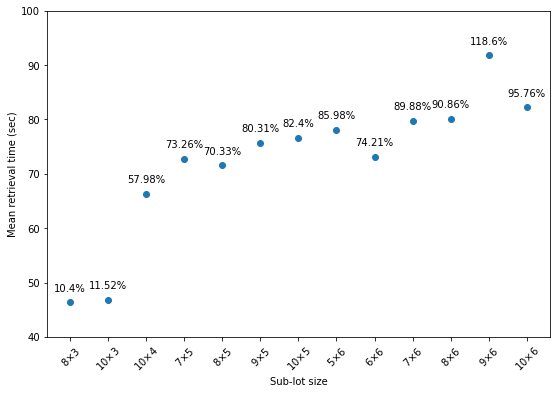

In [37]:
plt.figure(figsize=(9,6))
plt.plot(list(mean_rt.values()), 'o')
plt.xlabel("Sub-lot size")
plt.ylabel("Mean retrieval time (sec)")
plt.xticks(list(range(len(n_sorted))),[str(x[0])+r'$\times$'+str(x[1]) for x in n_sorted], rotation=45)
plt.yticks()
plt.ylim(40, 100)
for i, j in [(i, j) for i, j in enumerate(list(mean_rt.values()))]:
    plt.text(i, j+2, str(list(percent_increase_rt.values())[i])+'%', ha='center')
#plt.savefig('cardinal_lot_mean_rt.pdf')
plt.show()